### Loading libraries and defining churn

In [2]:
import pandas as pd 
import numpy as np 
from datetime import timedelta 

rfm = pd.read_csv("../data/processed/rfm_table.csv")
snapshot_date = pd.to_datetime('2011-12-10')

# adding churn label 
rfm['Churn'] =  np.where(rfm['Recency']>180,1,0) 
rfm['Churn'].value_counts()

Churn
0    3478
1     860
Name: count, dtype: int64

### Feature Selection

In [3]:
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Churn']

### Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

### Train Classifier (Random Forest)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix 

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1054
           1       1.00      1.00      1.00       248

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302



### Visualize Results

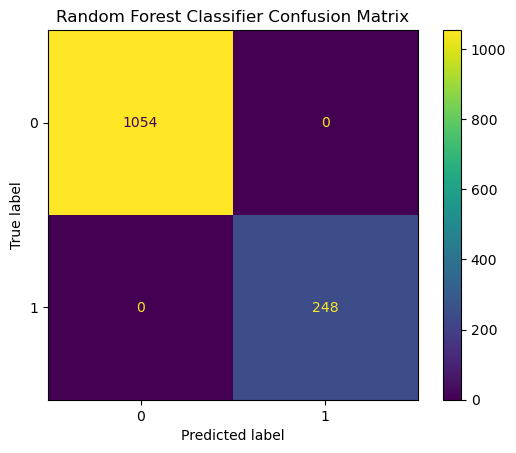

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay 

ConfusionMatrixDisplay.from_estimator(model,X_test,y_test) 
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

###  Feature Importance

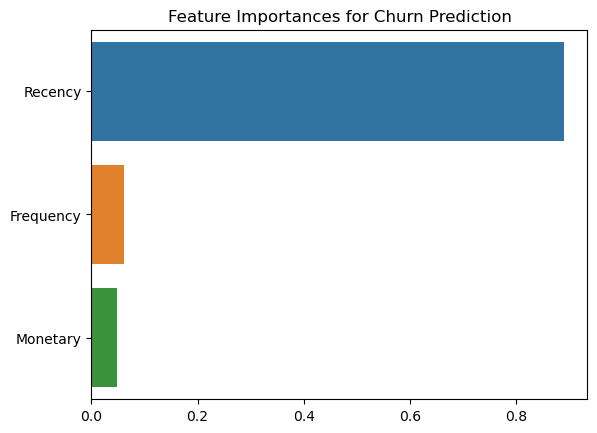

In [7]:
importances = model.feature_importances_ 
feat_names = X.columns 

sns.barplot(x=importances,y=feat_names) 
plt.title('Feature Importances for Churn Prediction')
plt.show()

In [8]:
import joblib
joblib.dump(model, '../models/churn_predictor.pkl')


['../models/churn_predictor.pkl']

In [9]:
rfm.to_csv("../data/processed/rfm_table.csv", index=False)